<a href="https://colab.research.google.com/github/TING-JHEN/123/blob/master/%E5%85%A8%E9%80%A3%E7%B5%90%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version

Currently selected TF version: 2.x
Available versions:
* 1.x
* 2.x


In [2]:
%tensorflow_version 2.x

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf

In [5]:
from tensorflow.keras.datasets import mnist

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### 看數據內容

正確答案: 1


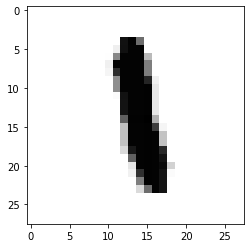

In [7]:
n = 9487
plt.imshow(x_train[n], cmap="Greys")
print("正確答案:", y_train[n])

### 資料整理

In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [13]:
y_train[9487]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### 打造神經網路

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [15]:
model = Sequential()

In [16]:
model.add(Dense(87, input_dim=784, activation="relu"))

In [17]:
model.add(Dense(87, activation="relu"))

In [18]:
model.add(Dense(10, activation="softmax"))

### 組裝我們的神經網路

In [19]:
model.compile(loss="mse", optimizer=SGD(lr=0.087), metrics=["accuracy"])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 87)                68295     
_________________________________________________________________
dense_1 (Dense)              (None, 87)                7656      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                880       
Total params: 76,831
Trainable params: 76,831
Non-trainable params: 0
_________________________________________________________________


### 訓練

In [24]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0085 - accuracy: 0.9475
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0084 - accuracy: 0.9480
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0083 - accuracy: 0.9492
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0082 - accuracy: 0.9495
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0081 - accuracy: 0.9501
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0080 - accuracy: 0.9506
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0079 - accuracy: 0.9511
Epoch 8/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0078 - accuracy: 0.9520
Epoch 9/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0077 - accuracy: 0.9519
Epoch 10/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0076 - accuracy: 0.9528

### 訓練成果

In [25]:
result = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [30]:
def show_predict(n):
  print("預測是:",result[n])
  plt.imshow(x_test[n].reshape(28,28), cmap="Greys")

預測是: 2


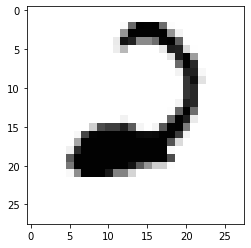

In [31]:
show_predict(9487)